# IMPORTING LIBRARIES AND DATASET UPLOADING

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fancyimpute import KNN
from random import randrange, uniform
from scipy.stats import chi2_contingency
%matplotlib inline

Using TensorFlow backend.


THE FILE LOCATION SHOULD BE CHANGED IN OS.CHDIR FUNCTION ACCORDING TO THE USER FILE LOCATION.

In [2]:
os.chdir("C:/Users/hp/Desktop/date  time finel copy")

In [3]:
fare = pd.read_csv("train_cab.csv")
fare.shape

(16067, 7)

# DATA EXPLORATION

In [4]:
fare.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16043 non-null object
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: float64(5), object(2)
memory usage: 878.7+ KB


In [6]:
fare['fare_amount'] = fare['fare_amount'].convert_objects(convert_numeric=True)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [7]:
fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [8]:
# DATA 

FORMING A DIFFERENT COLUMNS OF DATE AND TIME BY SPLIT IT FROM UTC TAKE OUT FIRST ATTRIBUTE

In [9]:
fare["datetime"] =fare["pickup_datetime"].apply(lambda x: x.split("UTC")[0])

In [10]:
type(fare["pickup_datetime"].iloc[0])

str

In [11]:
fare["datetime"]= pd.to_datetime(fare["pickup_datetime"] ,errors='coerce')

In [12]:
fare["date"]=fare["datetime"].apply(lambda x: x.date)
fare["time"]=fare["datetime"].apply(lambda x: x.time)
#fare["date"]=fare["pickup_datetime"].apply(lambda x: x.date())

In [13]:
fare.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,datetime,date,time
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,2009-06-15 17:26:21+00:00,2009-06-15,17:26:21
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,2010-01-05 16:52:16+00:00,2010-01-05,16:52:16
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,2011-08-18 00:35:00+00:00,2011-08-18,00:35:00
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,2012-04-21 04:30:42+00:00,2012-04-21,04:30:42
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,2010-03-09 07:51:00+00:00,2010-03-09,07:51:00


In [14]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 10 columns):
fare_amount          16042 non-null float64
pickup_datetime      16067 non-null object
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
datetime             16066 non-null datetime64[ns, UTC]
date                 16066 non-null object
time                 16066 non-null object
dtypes: datetime64[ns, UTC](1), float64(6), object(3)
memory usage: 1.2+ MB


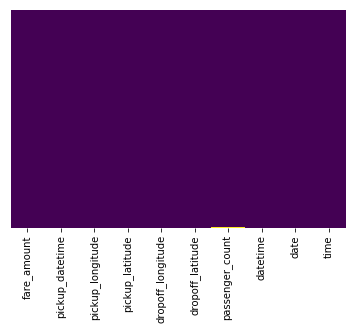

In [15]:
sns.heatmap(fare.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
fare.isna().sum()

fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
datetime              1
date                  1
time                  1
dtype: int64

# FINDING OUT OF DIFFERENT MISSING VALUES AND PUT IT DIFFERENT SET OF NAME MISSING_PERCENTAGE

In [17]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(fare.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(fare))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Miising_perc.csv", index = False)

In [18]:
missing_val

,Variables,Missing_percentage
0,passenger_count,0.342317
1,fare_amount,0.155598
2,datetime,0.006224
3,date,0.006224
4,time,0.006224
5,pickup_datetime,0.000000
6,pickup_longitude,0.000000
7,pickup_latitude,0.000000
8,dropoff_longitude,0.000000
9,dropoff_latitude,0.000000


In [19]:
fare["fare_amount"].value_counts().head()

6.5    759
4.5    671
8.5    630
5.3    475
4.9    464
Name: fare_amount, dtype: int64

REMOVING OF ALL THE VALUES LESS THAN ZERO

In [20]:
fare= fare[~(fare["fare_amount"] <0)]

In [21]:
fare= fare[~(fare["passenger_count"]<0)]

In [22]:
fare.isnull().sum()

fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
datetime              1
date                  1
time                  1
dtype: int64

In [23]:
fare['fare_amount'] = fare['fare_amount'].convert_objects(convert_numeric=True)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


REMOVING OF USELESS COLUMNS NAME PICKUP_DATETIME AND DATETIME

In [24]:
fare = fare.drop(["pickup_datetime", "datetime"], axis=1)
fr = fare.copy(deep=False)


# DATA PREPROCESSING

# MISSING VALUE IMPUTATION

FINDIND THE MOST IMPORTANT METHOD OF IMPUTATION BY REMOVING CERTAIN VALUE AND THAN FIND OUT WHICH 
IMPUTATION GIVES VALUE CLOSER TO TRUE VALUE.THESE FOUR COLUMN HAS MISSING VALUE

In [25]:
fare["fare_amount"].loc[1] =np.nan 
fare["passenger_count"].loc[27] = np.nan
fare["date"].loc[100]=np.nan
fare["time"].loc[50]=np.nan

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [26]:
# GIVES NO OF MISSING VALUE
fare.isnull().sum()

fare_amount          26
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      56
date                  2
time                  2
dtype: int64

In [27]:
#fare["date"].loc[100]
#fare["time"].loc[50]

HERE WE PUT THE DIFFRENT IMPUTATION VALUES COMES OUT BY DIFFERENT IMPUTATION METHOD OF THE OBSEVATION WE REMOVE BEFORE WE CHOOSE THE METHOD WHICH GIVES MOST ACCURATE METHOD    

In [28]:
# for fare amount =16.9
#mean value=15.014
#median value=8.5
#knn value =7.9130
# SO HERE WE CHOOSE MEAN FOR FARE AMOUNT

# for passenger count=3
#mean value =2.625
#median value=1
#mode value=1
#knn value =2.44
# HERE WE CHOOSE mode VALUE FOR PASSENGER COUNT BECAUSE PASSENGER COUNT CAN NOT COMES IN DECIMAL 

# for date =(2014, 11, 12)
#mode value=2011-06-13
#knn=2014-11-12 

#for time(9, 9, 21)
#mode value=19:43:00 
#knn=(9, 9, 25)
# so for fare amount nearest value is from mean and for passenger count nearest value is from knn
 # DATE AND TIME HAS ONLY ONE MISSING VALUE WE CAN IGNORE IT OR IMPUTE BY ANY METHOD

DIFFERENT COMMANDS FOR IMPUTING

In [29]:
fare["fare_amount"] =fare["fare_amount"].fillna(fare["fare_amount"].mean())
#fare["passenger_count"] =fare["passenger_count"].fillna(fare["passenger_count"]).mean()

In [30]:
#fare["fare_amount"] =fare["fare_amount"].fillna(fare["fare_amount"]).median()
#fare["passenger_count"] =fare["passenger_count"].fillna(fare["passenger_count"]).median()

In [31]:
#from scipy.stats.mstats import mode
#fare["passenger_count"] =fare["passenger_count"].fillna(fare["passenger_count"].mode()[:] , inplace=True)
#fare["passenger_count"].value_counts().head()

In [32]:
#fare["fare_amount"].loc[1]
fare["passenger_count"]= fare["passenger_count"].fillna(1)

In [33]:
fare.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
date                 2
time                 2
dtype: int64

In [34]:
fare["passenger_count"] = fare["passenger_count"].astype("object")

In [35]:
fare.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
date                 2
time                 2
dtype: int64

we used value_counts() to get a mode value . it gives the value of top occurance in a column

In [36]:
fare["date"].value_counts().head(2)

2011-06-13    17
2012-01-21    17
Name: date, dtype: int64

In [37]:
fare["time"].value_counts().head(4)

19:43:00    19
18:10:00    16
20:11:00    16
20:49:00    15
Name: time, dtype: int64

In [38]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16064 entries, 0 to 16066
Data columns (total 8 columns):
fare_amount          16064 non-null float64
pickup_longitude     16064 non-null float64
pickup_latitude      16064 non-null float64
dropoff_longitude    16064 non-null float64
dropoff_latitude     16064 non-null float64
passenger_count      16064 non-null object
date                 16062 non-null object
time                 16062 non-null object
dtypes: float64(5), object(3)
memory usage: 1.7+ MB


In [39]:
fare[fare.isna().any(axis=1)]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time
50,9.7,-73.985582,40.739765,-73.973899,40.760426,1,2011-12-06,NaN
100,10.0,-74.002581,40.739572,-73.994580,40.760682,1,NaN,12:40:29
1327,11.5,-73.981947,40.728200,-73.988582,40.759202,1,NaT,NaT


In [40]:
#KNN imputation
#Assigning levels to the categories
lis = []
for i in range(0, fare.shape[1]):
       #print(i)
   
             if(fare.iloc[:,i].dtypes == 'object'):
                fare.iloc[:,i] = pd.Categorical(fare.iloc[:,i])
        #print(titanic[[i]])
                
                fare.iloc[:,i] = fare.iloc[:,i].cat.codes 
                fare.iloc[:,i] = fare.iloc[:,i].astype("category")
                
        
                lis.append(fare.columns[i])
        

In [41]:
#sns.pairplot(fare)
fare.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
date                 0
time                 0
dtype: int64

In [42]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16064 entries, 0 to 16066
Data columns (total 8 columns):
fare_amount          16064 non-null float64
pickup_longitude     16064 non-null float64
pickup_latitude      16064 non-null float64
dropoff_longitude    16064 non-null float64
dropoff_latitude     16064 non-null float64
passenger_count      16064 non-null category
date                 16064 non-null category
time                 16064 non-null category
dtypes: category(3), float64(5)
memory usage: 1.9 MB


In [43]:
fare.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time
0,4.500000,-73.844311,40.721319,-73.841610,40.712278,2,165,6208
1,15.018219,-74.016048,40.711303,-73.979268,40.782004,2,369,5957
2,5.700000,-73.982738,40.761270,-73.991242,40.750562,4,956,224
3,7.700000,-73.987130,40.733143,-73.991567,40.758092,2,1202,1246
4,5.300000,-73.968095,40.768008,-73.956655,40.783762,2,431,2029


In [44]:
#from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler
# KNN WILL NOT IMPUTE ANY VALUE AS ALL THE VALUES HAVE IMPUTED BY USING MEAN AND MODE

In [45]:
#fare = pd.DataFrame(KNN(k = 3).complete(fare), columns = fare.columns)

In [46]:
fare.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time
0,4.500000,-73.844311,40.721319,-73.841610,40.712278,2,165,6208
1,15.018219,-74.016048,40.711303,-73.979268,40.782004,2,369,5957
2,5.700000,-73.982738,40.761270,-73.991242,40.750562,4,956,224
3,7.700000,-73.987130,40.733143,-73.991567,40.758092,2,1202,1246
4,5.300000,-73.968095,40.768008,-73.956655,40.783762,2,431,2029


In [47]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16064 entries, 0 to 16066
Data columns (total 8 columns):
fare_amount          16064 non-null float64
pickup_longitude     16064 non-null float64
pickup_latitude      16064 non-null float64
dropoff_longitude    16064 non-null float64
dropoff_latitude     16064 non-null float64
passenger_count      16064 non-null category
date                 16064 non-null category
time                 16064 non-null category
dtypes: category(3), float64(5)
memory usage: 1.9 MB


NOW SAVE THE FARE FILE AS fare train

In [48]:
fare.to_csv("fare_train.csv" , index=False)

In [49]:
fare_train= pd.read_csv("fare_train.csv")
fare_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time
0,4.500000,-73.844311,40.721319,-73.841610,40.712278,2,165,6208
1,15.018219,-74.016048,40.711303,-73.979268,40.782004,2,369,5957
2,5.700000,-73.982738,40.761270,-73.991242,40.750562,4,956,224
3,7.700000,-73.987130,40.733143,-73.991567,40.758092,2,1202,1246
4,5.300000,-73.968095,40.768008,-73.956655,40.783762,2,431,2029


In [50]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16064 entries, 0 to 16066
Data columns (total 8 columns):
fare_amount          16064 non-null float64
pickup_longitude     16064 non-null float64
pickup_latitude      16064 non-null float64
dropoff_longitude    16064 non-null float64
dropoff_latitude     16064 non-null float64
passenger_count      16064 non-null float64
date                 16062 non-null object
time                 16062 non-null object
dtypes: float64(6), object(2)
memory usage: 1.7+ MB


In [51]:
fare_train["date"] = fare_train["date"].astype("object")
fare_train["time"] = fare_train["time"].astype("object")
fare_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16064 entries, 0 to 16063
Data columns (total 8 columns):
fare_amount          16064 non-null float64
pickup_longitude     16064 non-null float64
pickup_latitude      16064 non-null float64
dropoff_longitude    16064 non-null float64
dropoff_latitude     16064 non-null float64
passenger_count      16064 non-null int64
date                 16064 non-null object
time                 16064 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 1004.1+ KB


NOW PUTING BACK THE ORIGINAL VALUES OF DATE AND TIME USING FR DATASET

In [52]:
for i in range (0 , fare_train.shape[1]):
    if(fare_train.iloc[:,i].dtypes == 'object'):
        
        fare_train.iloc[:,i] = fare_train.iloc[:,i].astype("category")
        fr.iloc[:,i] = fr.iloc[:,i].astype("category")
        d = dict(enumerate(fr.iloc[:,i].cat.categories))
        fare_train.iloc[:,i] = fare_train.iloc[:,i].map(d)   

In [53]:
fare_train

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time
0,4.500000,-73.844311,40.721319,-73.841610,40.712278,2,2009-06-15,17:26:21
1,15.018219,-74.016048,40.711303,-73.979268,40.782004,2,2010-01-05,16:52:16
2,5.700000,-73.982738,40.761270,-73.991242,40.750562,4,2011-08-18,00:35:00
3,7.700000,-73.987130,40.733143,-73.991567,40.758092,2,2012-04-21,04:30:42
4,5.300000,-73.968095,40.768008,-73.956655,40.783762,2,2010-03-09,07:51:00
5,12.100000,-74.000964,40.731630,-73.972892,40.758233,2,2011-01-06,09:50:45
6,7.500000,-73.980002,40.751662,-73.973802,40.764842,2,2012-11-20,20:35:00
7,16.500000,-73.951300,40.774138,-73.990095,40.751048,2,2012-01-04,17:22:00
8,15.018219,-74.006462,40.726713,-73.993078,40.731628,2,2012-12-03,13:10:00
9,8.900000,-73.980658,40.733873,-73.991540,40.758138,4,2009-09-02,01:11:00


In [54]:
#fare_train.to_csv("fare.csv" , index=False)

In [55]:
fare_train.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
date                 2
time                 2
dtype: int64

In [56]:
# CHANGING THE NAME OF fare_train TO fare
fare = fare_train

In [57]:
# remove nan values of date and time containing only one null value
fare = fare.dropna()

# OUTLIER ANALYSIS

In [58]:
fare.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'date',
       'time'],
      dtype='object')

forming the box plot gives the outliers values graphically and median value at a time

In [59]:
#names of numeric columns
cnames= ['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
catnames= ['date' ,'time']
fare_box= fare[cnames]
fare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16061 entries, 0 to 16063
Data columns (total 8 columns):
fare_amount          16061 non-null float64
pickup_longitude     16061 non-null float64
pickup_latitude      16061 non-null float64
dropoff_longitude    16061 non-null float64
dropoff_latitude     16061 non-null float64
passenger_count      16061 non-null int64
date                 16061 non-null datetime64[ns]
time                 16061 non-null object
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.1+ MB


 BOX PLOT TO GET THE OUTLIER GRAPHICALLY

{'whiskers': [<matplotlib.lines.Line2D at 0xe8c78889e8>,
 'caps': [<matplotlib.lines.Line2D at 0xe8c7888ef0>,
 'boxes': [<matplotlib.patches.PathPatch at 0xe8c7888780>],
 'medians': [<matplotlib.lines.Line2D at 0xe8c806c828>],
 'fliers': [<matplotlib.lines.Line2D at 0xe8c806cb70>],
 'means': []}

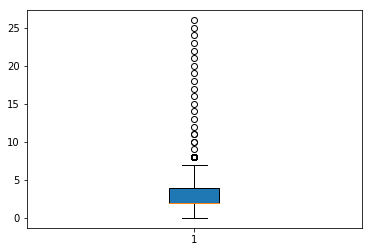

In [60]:
#sns.set_style("whitegrid")
%matplotlib inline
#plt.figure(figsize=(6, 6))
plt.boxplot(fare['passenger_count'],vert=True,patch_artist=True )

BOX PLOT SHOWING ALL THE NUMERIC VARIABLE TOGETHER ON GRAPH

[]

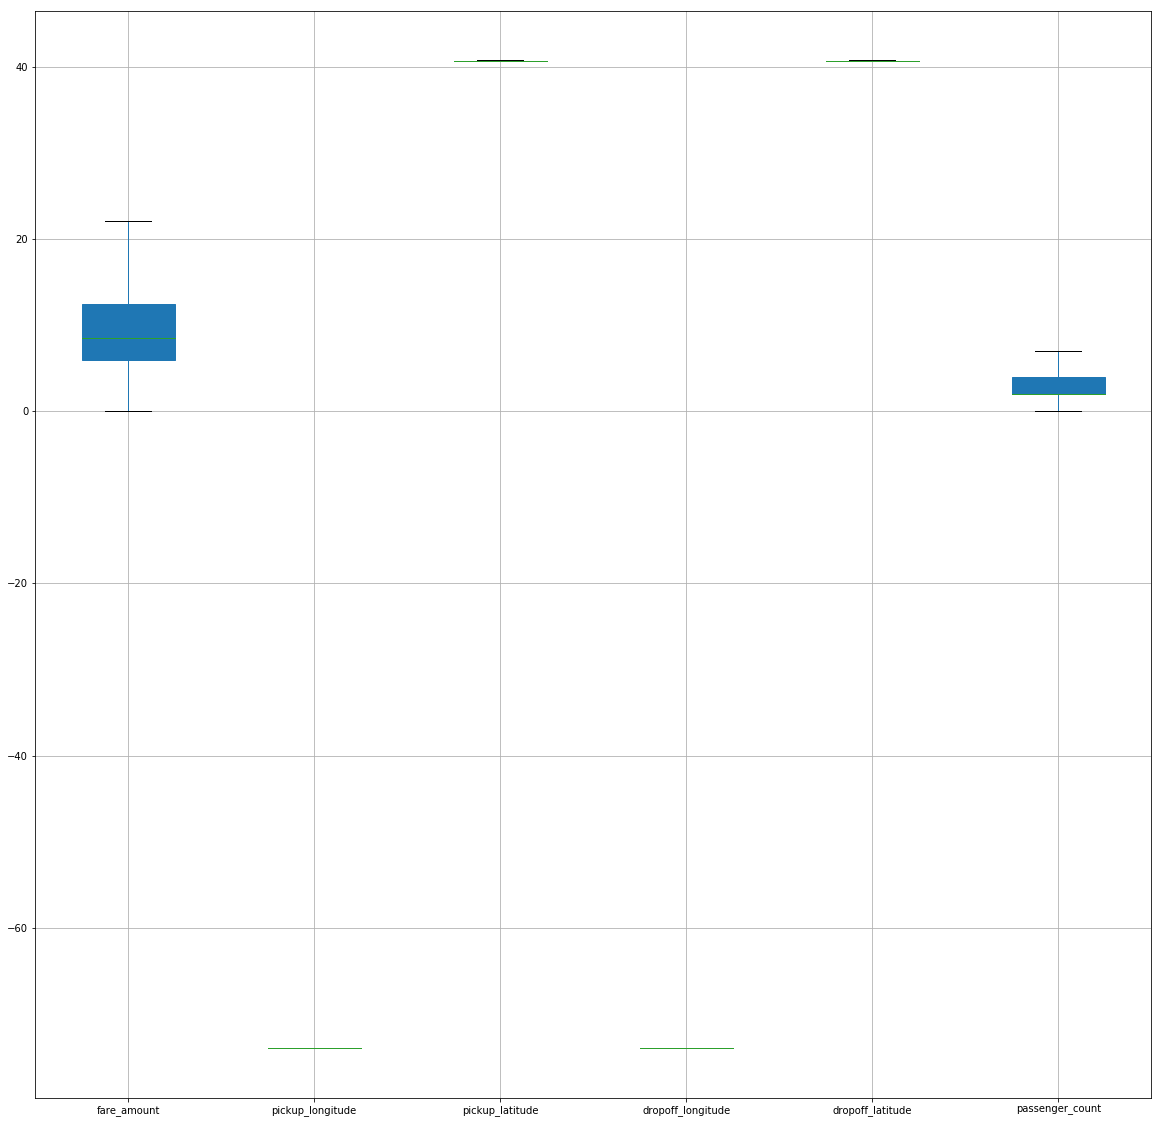

In [61]:
# all the box plot on the same figure
plt.figure(figsize=(20,20))
fare_box.boxplot(return_type="dict", patch_artist = True, vert=True ,showfliers=False )
plt.plot()

In [62]:
#fare_cat is the dataset containing only categorical value
fare_cat= fare[catnames]

In [63]:
fare.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time
0,4.500000,-73.844311,40.721319,-73.841610,40.712278,2,2009-06-15,17:26:21
1,15.018219,-74.016048,40.711303,-73.979268,40.782004,2,2010-01-05,16:52:16
2,5.700000,-73.982738,40.761270,-73.991242,40.750562,4,2011-08-18,00:35:00
3,7.700000,-73.987130,40.733143,-73.991567,40.758092,2,2012-04-21,04:30:42
4,5.300000,-73.968095,40.768008,-73.956655,40.783762,2,2010-03-09,07:51:00


# now removing all the outlier values using a loop. removing date and time from dataset as they are categorical in nature

In [64]:
fare= fare.drop(["date" , "time"], axis=1)

In [65]:
# #Detect and delete outliers from data
for i in cnames:
        print(i)
        q75, q25 = np.percentile(fare.loc[:,i], [75 ,25])
        iqr = q75 - q25

        min = q25 - (iqr*1.5)
        max = q75 + (iqr*1.5)
        print(min)
        print(max)
       
        fare = fare.drop(fare[fare.loc[:,i] < min].index)
        fare = fare.drop(fare[fare.loc[:,i] > max].index)
        # #Replace with NA
        #fare.loc[fare[i] < min,:i] = np.nan
        #fare.loc[fare[i] > max,:i] = np.nan

# #Calculate missing value
        #missing_val = pd.DataFrame(fare.isnull().sum())

#Reset index
        #missing_val = missing_val.reset_index()

#Rename variable
        #missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

    #Calculate percentage
        #missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(fare))*100

#descending order
        #missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

 #Impute with KNN

#fare= pd.DataFrame(KNN(k = 3).complete(fare), columns = fare.columns)

fare_amount
-3.75
22.25
pickup_longitude
-74.02811811999997
-73.93294180000002
pickup_latitude
40.69341574999999
40.81095975
dropoff_longitude
-74.02583313
-73.93519592999999
dropoff_latitude
40.694055535000004
40.811476775
passenger_count
-1.0
7.0


In [66]:
fare.shape

(13017, 6)

In [67]:
#missing_val due to outliers
#missing_val.to_csv("missing outlier perc.csv")


In [68]:
# put this value into fare outlier analysis dataset
#fare.to_csv("fare outlier analysis.csv" , index=False)

In [69]:
fare= pd.read_csv("fare outlier analysis.csv")

In [70]:
#join back the categorical column
fare = fare.join(fare_cat)

In [71]:
fare.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time
0,15.018219,-74.016048,40.711303,-73.979268,40.782004,2,2009-06-15,17:26:21
1,5.700000,-73.982738,40.761270,-73.991242,40.750562,4,2010-01-05,16:52:16
2,7.700000,-73.987130,40.733143,-73.991567,40.758092,2,2011-08-18,00:35:00
3,5.300000,-73.968095,40.768008,-73.956655,40.783762,2,2012-04-21,04:30:42
4,12.100000,-74.000964,40.731630,-73.972892,40.758233,2,2010-03-09,07:51:00


In [72]:
fare.shape

(13017, 8)

# FEATURE SELECTION

In [73]:
#separating columns by continuous and categorical variable
cname_select= ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
catnames_select=["date", "time"]

In [74]:
#forming a dataset containg only categorical variable
df_corr = fare.loc[:,cname_select]

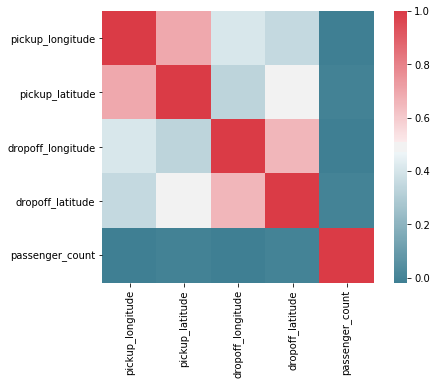

In [75]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

HERE IN HEATMAP WE CAN SEE NO TWO VARIABLE ARE PURELY DEPENDENT 

In [76]:
fare["date"] = fare["date"].astype("object")
fare["time"] = fare["time"].astype("object")
fare["fare_amount"]=fare["fare_amount"].astype("float")
fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13017 entries, 0 to 13016
Data columns (total 8 columns):
fare_amount          13017 non-null float64
pickup_longitude     13017 non-null float64
pickup_latitude      13017 non-null float64
dropoff_longitude    13017 non-null float64
dropoff_latitude     13017 non-null float64
passenger_count      13017 non-null int64
date                 13014 non-null object
time                 13014 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 813.6+ KB


In [77]:
for i in catnames_select:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(fare['fare_amount'], fare[i]))
    print(p)

date
0.6749450185820663
time
1.0


In [78]:
#remove date categorical variable as it is independent with fare_amount

In [79]:
fare = fare.drop(["time", "date"] , axis=1)

In [80]:
fare['fare_amount'] = fare['fare_amount'].convert_objects(convert_numeric=True)
fare.head()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,15.018219,-74.016048,40.711303,-73.979268,40.782004,2
1,5.700000,-73.982738,40.761270,-73.991242,40.750562,4
2,7.700000,-73.987130,40.733143,-73.991567,40.758092,2
3,5.300000,-73.968095,40.768008,-73.956655,40.783762,2
4,12.100000,-74.000964,40.731630,-73.972892,40.758233,2


# feature scaling

In [81]:
#normality check
#plt.hist(fare["fare_amount"])

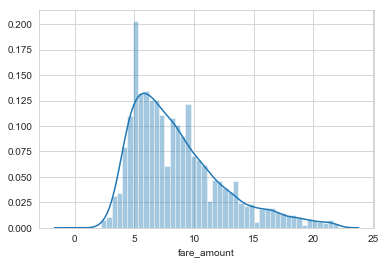

In [82]:
sns.set_style("whitegrid")
sns.distplot(fare["fare_amount"], bins=50)

In [83]:
#it is skew toward left so we have to normalise the columns not stadardize them

In [84]:
fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,13017.000000,13017.000000,13017.000000,13017.000000,13017.000000,13017.000000
mean,8.573070,-73.981858,40.753002,-73.981026,40.753391,2.828301
std,3.824154,0.016046,0.021137,0.016513,0.021915,1.516384
min,0.000000,-74.018108,40.693504,-74.019535,40.694260,0.000000
25%,5.700000,-73.992843,40.738622,-73.992078,40.738813,2.000000
50%,7.700000,-73.982662,40.753638,-73.982083,40.754566,2.000000
75%,10.500000,-73.971445,40.766877,-73.970761,40.767368,4.000000
max,22.100000,-73.932999,40.810862,-73.935228,40.811455,7.000000


In [85]:
fare.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,13017.000000,13017.000000,13017.000000,13017.000000,13017.000000,13017.000000
mean,8.573070,-73.981858,40.753002,-73.981026,40.753391,2.828301
std,3.824154,0.016046,0.021137,0.016513,0.021915,1.516384
min,0.000000,-74.018108,40.693504,-74.019535,40.694260,0.000000
25%,5.700000,-73.992843,40.738622,-73.992078,40.738813,2.000000
50%,7.700000,-73.982662,40.753638,-73.982083,40.754566,2.000000
75%,10.500000,-73.971445,40.766877,-73.970761,40.767368,4.000000
max,22.100000,-73.932999,40.810862,-73.935228,40.811455,7.000000


THESE ARE THE PAIRPLOT AFTER ALL THE PREPROCESSING WORK WE HAVE DONE

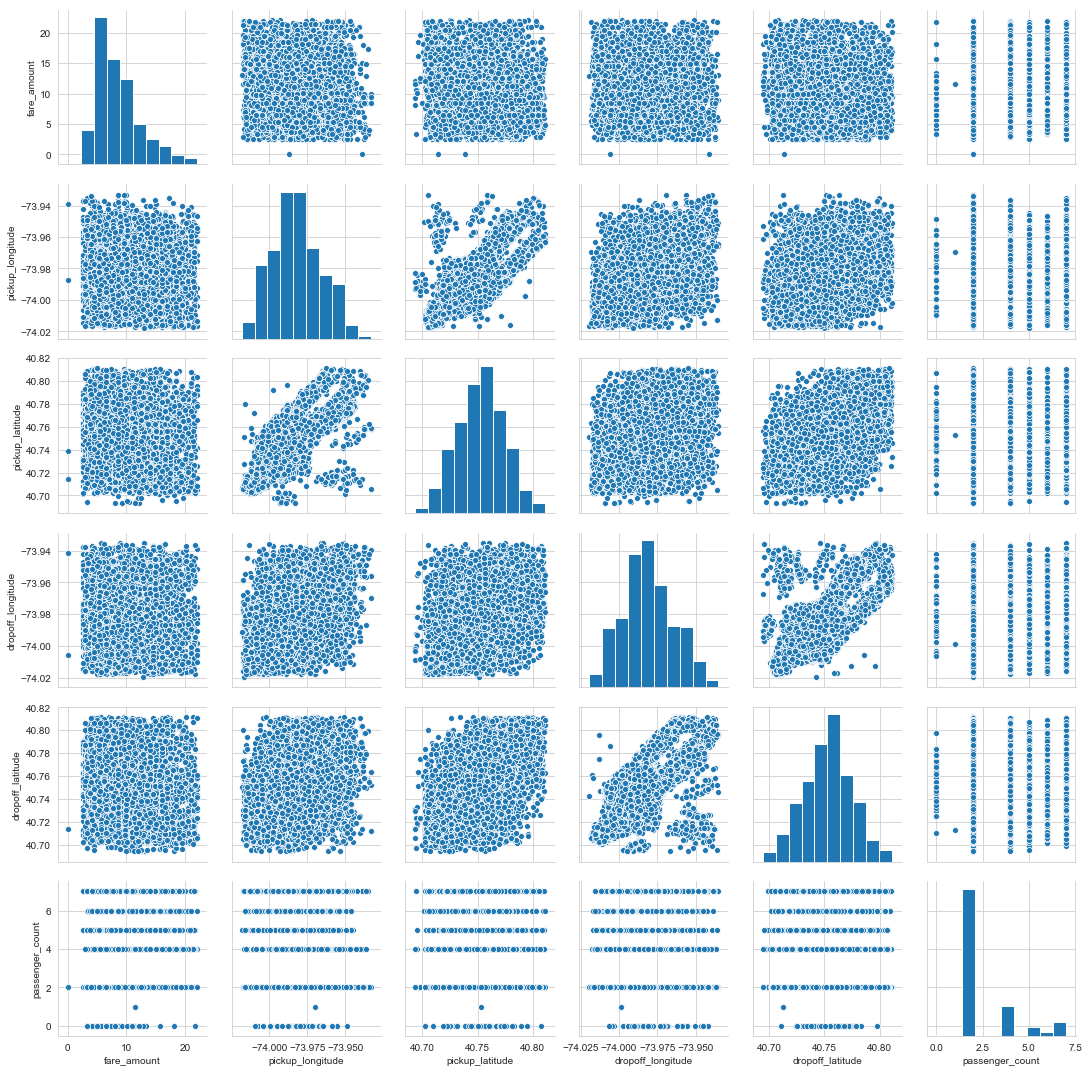

In [86]:
sns.pairplot(fare)

# DATA MODELLING

# linear regression

SO IF WE WANT TO USE MAPE TO FIND THE BEST MODEL THAN WE HAVE TO MAKE ALL THE "fare_amount" VALUE GREATER THAN ZERO OTHERWISE MAPE ERROR WHICH IS EASY TO COMPARE CAME OUT TO BE INFINITY

In [87]:
fare_zero= fare[fare["fare_amount"] ==0]
fare_zero
#here are one value which is eqaul to zero so we can remove it

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
8128,0.0,-73.987115,40.738808,-74.005911,40.71396,2


In [88]:
fare= fare[fare["fare_amount"] >0]

we copied the original data so that we can used various respective transformation on that copied data

In [89]:
# form the copy of fare dataset into fare_lr
fare_lr= fare.copy(deep=True)

In [90]:
fare_lr.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [91]:
cnames=['fare_amount', 'pickup_longitude', 'pickup_latitude', 'passenger_count']

#here we are scaling the data as distance is used while forming the model

we can used this loop or not error does not show much difference it is upto us but i am not using this loop as different mse ,msre,mae  error can be compairable without it

for i in cnames:
    print(i)
    fare_lr[i] = (fare_lr[i] - fare_lr[i].min())/(fare_lr[i].max() - fare_lr[i].min())

In [92]:
fare.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,15.018219,-74.016048,40.711303,-73.979268,40.782004,2
1,5.700000,-73.982738,40.761270,-73.991242,40.750562,4
2,7.700000,-73.987130,40.733143,-73.991567,40.758092,2
3,5.300000,-73.968095,40.768008,-73.956655,40.783762,2
4,12.100000,-74.000964,40.731630,-73.972892,40.758233,2


In [93]:
fare_lr.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,15.018219,-74.016048,40.711303,-73.979268,40.782004,2
1,5.700000,-73.982738,40.761270,-73.991242,40.750562,4
2,7.700000,-73.987130,40.733143,-73.991567,40.758092,2
3,5.300000,-73.968095,40.768008,-73.956655,40.783762,2
4,12.100000,-74.000964,40.731630,-73.972892,40.758233,2


these following commands will be used if we take date and time column for modelling but we have removed them as the are independent with target variable

In [94]:
fare_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13016 entries, 0 to 13016
Data columns (total 6 columns):
fare_amount          13016 non-null float64
pickup_longitude     13016 non-null float64
pickup_latitude      13016 non-null float64
dropoff_longitude    13016 non-null float64
dropoff_latitude     13016 non-null float64
passenger_count      13016 non-null int64
dtypes: float64(5), int64(1)
memory usage: 711.8 KB


In [95]:
fare_lr.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,15.018219,-74.016048,40.711303,-73.979268,40.782004,2
1,5.700000,-73.982738,40.761270,-73.991242,40.750562,4
2,7.700000,-73.987130,40.733143,-73.991567,40.758092,2
3,5.300000,-73.968095,40.768008,-73.956655,40.783762,2
4,12.100000,-74.000964,40.731630,-73.972892,40.758233,2


now we have two x and y rows 
above rows form simple model but below rows remove the column having the values of p greater than .005 so use below row

In [96]:
#x = fare_lr.drop("fare_amount" , axis=1)
#y= fare_lr["fare_amount"]

In [97]:
fare_lr.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [98]:
#here we can see that fare_amount is depends on pickup_longitude , dropoff_longitude, dropoff_latitude as only its p value is less than .5
x= fare_lr.drop( ['passenger_count', 'fare_amount'], axis=1)
y=fare_lr["fare_amount"]
#x= x.values.reshape(-1,1)
#x.head()

In [99]:
from sklearn import metrics

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.4)

# Creating and Training the Model

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
lm =LinearRegression()

In [104]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
import statsmodels.api as sm

In [106]:
fare_lr.shape

(13016, 6)

In [107]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
pickup_longitude,-10.921882
pickup_latitude,-0.569902
dropoff_longitude,14.433497
dropoff_latitude,-18.895767


In [108]:
fare_lr.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,15.018219,-74.016048,40.711303,-73.979268,40.782004,2
1,5.700000,-73.982738,40.761270,-73.991242,40.750562,4
2,7.700000,-73.987130,40.733143,-73.991567,40.758092,2
3,5.300000,-73.968095,40.768008,-73.956655,40.783762,2
4,12.100000,-74.000964,40.731630,-73.972892,40.758233,2


In [109]:
model= sm.OLS(fare_lr.iloc[:,0], fare_lr.iloc[:,1:5].drop("pickup_latitude" , axis=1)).fit()

In [110]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 2.206e+04
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:22:13   Log-Likelihood:                -35863.
No. Observations:               13016   AIC:                         7.173e+04
Df Residuals:                   13013   BIC:                         7.175e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
pickup_longitude    -16.7900      2.059     -8.153      0.000     -20.826     -12.754
dropoff_longitude     9.5224      1.891      5.036      0.000       5.816      13.229
dropoff_latitude    -12.9832      1.268    -10.240      0.000     -15.469     -10.498
==============================================================================
Omnibus:                     1886.608   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2836.405
Skew:                           1.063   Prob(JB):                         0.00
Kurtosis:                       3.844   Cond. No.                     9.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
print(lm.intercept_)

1061.6066053632303


# Predictions from our Model

In [112]:
prediction = lm.predict(x_test)

HERE TWO GRAPH SHOWS THE DIFFERENCE BETWEEN THE PREDICTING VALUE AND ORIGINAL VALUE(TEST VALUE)

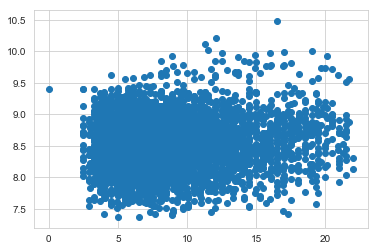

In [113]:
plt.scatter(y_test,prediction)

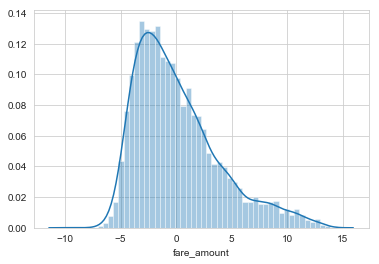

In [114]:
sns.distplot((y_test-prediction),bins=50)

In [115]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2.9774228445276023
MSE: 14.477550192664498
RMSE: 3.8049376069345078


In [116]:
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(y_test, prediction)

57.994391323394915

In [117]:
#with all variables mape is 40.7014 after removing indepemdent variable 39.99
# with normalisation mape is 40.613

In [118]:
#so here linear regression is not good method

# DECISION TREE

# CREATING AND TRAINING THE MODEL

In [119]:
fare.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,15.018219,-74.016048,40.711303,-73.979268,40.782004,2
1,5.700000,-73.982738,40.761270,-73.991242,40.750562,4
2,7.700000,-73.987130,40.733143,-73.991567,40.758092,2
3,5.300000,-73.968095,40.768008,-73.956655,40.783762,2
4,12.100000,-74.000964,40.731630,-73.972892,40.758233,2


In [120]:
fare_dt = fare.copy(deep=True)

In [121]:
fare_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13016 entries, 0 to 13016
Data columns (total 6 columns):
fare_amount          13016 non-null float64
pickup_longitude     13016 non-null float64
pickup_latitude      13016 non-null float64
dropoff_longitude    13016 non-null float64
dropoff_latitude     13016 non-null float64
passenger_count      13016 non-null int64
dtypes: float64(5), int64(1)
memory usage: 711.8 KB


In [122]:
x = fare_dt.drop("fare_amount" , axis=1) 
y = fare_dt["fare_amount"]

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40 , random_state=101)

In [124]:
from sklearn.tree import DecisionTreeRegressor

In [125]:
y_train= y_train.astype("int")

In [126]:
fit = DecisionTreeRegressor(criterion="mae", max_depth=9 ).fit(x_train, y_train)

# PREDICTING FROM OUR MODEL

In [127]:
prediction_dt= fit.predict(x_test)

In [128]:
from sklearn import metrics

In [129]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_dt))
print('MSE:', metrics.mean_squared_error(y_test, prediction_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_dt)))

MAE: 2.4220842859453278
MSE: 11.23248388988138
RMSE: 3.3514898015481682


In [130]:
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(y_test, prediction_dt)

28.208564759491807

In [131]:
#for max_depth =9
#form= mse split error is 29.69%
#for mae split error is 28.32
#for friedman_mse error is 29.64
# for max_depth = max ,error is 31.67

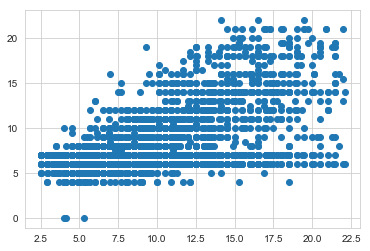

In [132]:
plt.scatter(y_test,prediction_dt)

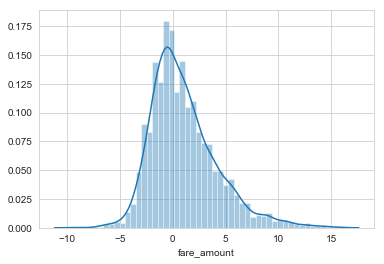

In [133]:
sns.distplot((y_test-prediction_dt),bins=50)

# RANDOM FOREST

# CREATING AND TRAINING THE MODEL

In [164]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500 )

In [165]:
fare_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13016 entries, 0 to 13016
Data columns (total 6 columns):
fare_amount          13016 non-null float64
pickup_longitude     13016 non-null float64
pickup_latitude      13016 non-null float64
dropoff_longitude    13016 non-null float64
dropoff_latitude     13016 non-null float64
passenger_count      13016 non-null int64
dtypes: float64(5), int64(1)
memory usage: 711.8 KB


y_train must be change into integer as random forest can’t take float value

In [166]:
y_train= y_train.astype("int")

In [167]:
rfr.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# PREDICTING OUR MODEL

In [168]:
prediction_rf = rfr.predict(x_test)

In [169]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_rf))
print('MSE:', metrics.mean_squared_error(y_test, prediction_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_rf)))

MAE: 1.5802160316722333
MSE: 5.223044938490796
RMSE: 2.2853982012968324


In [170]:
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(y_test, prediction_rf)

18.340839699434994

In [171]:
#for 100 , 25.816
      #50,26.11
    #10, 26.37
    #100 for max depth 18.59
    #50 18.97
    #500 , 18.35

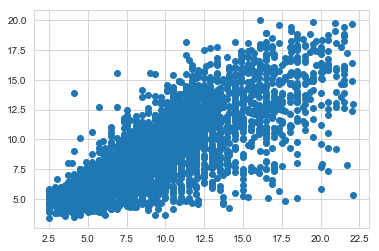

In [172]:
plt.scatter(y_test,prediction_rf)

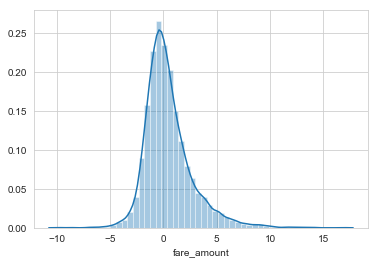

In [173]:
sns.distplot((y_test-prediction_rf),bins=50)

# K NEAREST NEIGHBOUR

# CREATING AND TRAINING THE MODEL

In [230]:
fare_knn = fare.copy(deep=True)

In [231]:
from sklearn.neighbors import KNeighborsRegressor

HERE WE HAVE TWO OPTIONS WE CAN STANDARDIZE OR NORMALIZE. WE WILL NORMALIZE AS TARGET VARIABLE IS SKEW SYMMETRIC

In [232]:
#from sklearn.preprocessing import StandardScaler

In [233]:
#scalar = StandardScaler()

In [234]:
#scalar.fit(fare_knn.drop("time", axis=1))

In [235]:
#scaled_features = scalar.transform(fare_knn.drop("time", axis=1))

In [236]:
#df_feat = pd.DataFrame(scaled_features,columns=fare_knn.columns[:-1])

In [237]:
#df_feat = df_feat.join(fare["time"])

In [238]:
#df_feat.describe()

In [239]:
fare_knn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13016 entries, 0 to 13016
Data columns (total 6 columns):
fare_amount          13016 non-null float64
pickup_longitude     13016 non-null float64
pickup_latitude      13016 non-null float64
dropoff_longitude    13016 non-null float64
dropoff_latitude     13016 non-null float64
passenger_count      13016 non-null int64
dtypes: float64(5), int64(1)
memory usage: 711.8 KB


In [240]:
fare.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,15.018219,-74.016048,40.711303,-73.979268,40.782004,2
1,5.700000,-73.982738,40.761270,-73.991242,40.750562,4
2,7.700000,-73.987130,40.733143,-73.991567,40.758092,2
3,5.300000,-73.968095,40.768008,-73.956655,40.783762,2
4,12.100000,-74.000964,40.731630,-73.972892,40.758233,2


In [241]:
#we will normalize not standardize as distribution of target variable is skew symetric

In [242]:
knnnames=['dropoff_latitude','fare_amount', 'pickup_longitude', 'pickup_latitude', 'passenger_count',"dropoff_longitude" ]

In [ ]:
#NORMALISATION LOOP
for i in knnnames:
    print(i)
    fare_knn[i] = (fare_knn[i] - fare_knn[i].min())/(fare_knn[i].max() - fare_knn[i].min())

In [243]:
fare_knn.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,13016.000000,13016.000000,13016.000000,13016.000000,13016.000000,13016.000000
mean,8.573728,-73.981858,40.753003,-73.981024,40.753394,2.828365
std,3.823563,0.016046,0.021138,0.016513,0.021913,1.516425
min,0.010000,-74.018108,40.693504,-74.019535,40.694260,0.000000
25%,5.700000,-73.992844,40.738619,-73.992078,40.738829,2.000000
50%,7.700000,-73.982660,40.753640,-73.982080,40.754570,2.000000
75%,10.500000,-73.971437,40.766878,-73.970760,40.767369,4.000000
max,22.100000,-73.932999,40.810862,-73.935228,40.811455,7.000000


In [244]:
from sklearn.neighbors import KNeighborsRegressor

In [245]:
knn = KNeighborsRegressor(n_neighbors=1)

In [246]:
x = fare_knn.drop("fare_amount" , axis=1) 
y = fare_knn["fare_amount"]

In [247]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40 , random_state=101)

In [248]:
knn_model = knn.fit(x_train, y_train)

# PREDICTING OUR MODEL

In [249]:
prediction_knn = knn_model.predict(x_test)

In [250]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_knn))
print('MSE:', metrics.mean_squared_error(y_test, prediction_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_knn)))

MAE: 2.0750292941435204
MSE: 8.553579672701744
RMSE: 2.9246503505037564


In [251]:
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(y_test, prediction_knn)

24.512647860057548

In [197]:
# with normalisation is 24.80
# without normalisation 24.51

# FORMING THE GRAPH BETWEEN DIFFERENT K VALUES AND ERROR

In [198]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error Rate')

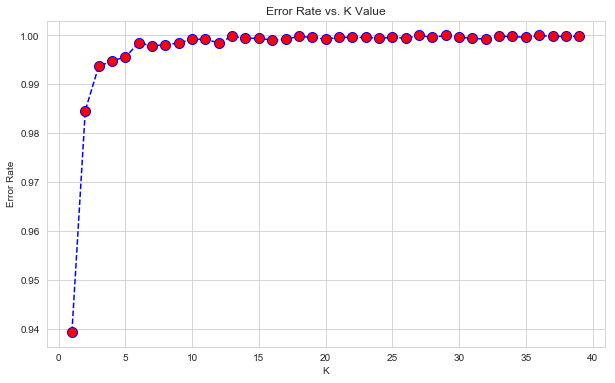

In [199]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

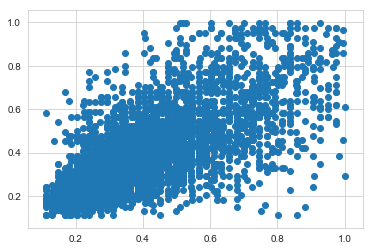

In [200]:
plt.scatter(y_test,prediction_knn)

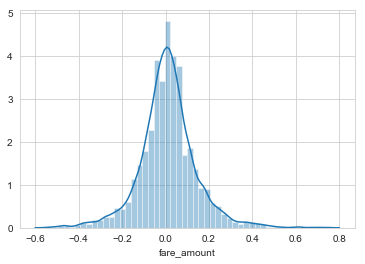

In [201]:
sns.distplot((y_test-prediction_knn),bins=50)

In [202]:
# PREDICT THE FARE AMOUNT FROM GIVEN SET NAMED "fare_test"

In [203]:
fare_test = pd.read_csv("test.csv")

In [204]:
pickup_date = pd.DataFrame({"pickup_datetime" :fare_test["pickup_datetime"] })

In [205]:
fare_test= fare_test.drop("pickup_datetime" , axis=1)

In [206]:
fare_test= fare_test.astype("float")

In [207]:
fare_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982524,40.751260,-73.979654,40.746139,1.0
3,-73.981160,40.767807,-73.990448,40.751635,1.0
4,-73.966046,40.789775,-73.988565,40.744427,1.0


In [208]:
predict_test= rfr.predict(fare_test)

In [209]:
predict_test

array([ 7.524,  7.68 ,  5.168, ..., 16.886, 16.742,  5.514])

In [210]:
df = pd.DataFrame({"fare_amount": predict_test})

In [211]:
df.head()

,fare_amount
0,7.524
1,7.680
2,5.168
3,8.722
4,12.438


In [212]:
finel_result = fare_test.join(df)
finel_result = finel_result.join(pickup_date)

In [213]:
finel_result.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,pickup_datetime
0,-73.973320,40.763805,-73.981430,40.743835,1.0,7.524,2015-01-27 13:08:24 UTC
1,-73.986862,40.719383,-73.998886,40.739201,1.0,7.680,2015-01-27 13:08:24 UTC
2,-73.982524,40.751260,-73.979654,40.746139,1.0,5.168,2011-10-08 11:53:44 UTC
3,-73.981160,40.767807,-73.990448,40.751635,1.0,8.722,2012-12-01 21:12:12 UTC
4,-73.966046,40.789775,-73.988565,40.744427,1.0,12.438,2012-12-01 21:12:12 UTC


In [252]:
finel_result.to_csv("test prediction result.csv")

THIS TEST PREDICTION RESULT GIVES THE FARE AMOUNT VALUE OF GIVEN SET